### **IMPORTING THE LIBRARIES :**

In [1]:
# to import datasets from google drive 
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
pip install polyglot

     |████████████████████████████████| 133kB 9.6MB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=52558 sha256=66e7073dfd26301cef2b6310217ebfcfd49d8f3c85550fc78d35cedd00799ac2
  Stored in directory: /root/.cache/pip/wheels/5e/91/ef/f1369fdc1203b0a9347d4b24f149b83a305f39ab047986d9da
Successfully built polyglot


In [3]:
pip install icu

     |████████████████████████████████| 51kB 4.2MB/s 


In [4]:
pip install -U git+https://github.com/aboSamoor/polyglot.git@master

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-rybii1na
  Running command git clone -q https://github.com/aboSamoor/polyglot.git /tmp/pip-req-build-rybii1na
     |████████████████████████████████| 235kB 9.1MB/s 
     |████████████████████████████████| 41.4MB 108kB/s 
  Created wheel for polyglot: filename=polyglot-16.7.4-py2.py3-none-any.whl size=70643 sha256=f3058ff55206a54f0e656cd98353febf387d6d3390c0dd967a9766b39a5a1a13
  Stored in directory: /tmp/pip-ephem-wheel-cache-67kqho3v/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Created wheel for PyICU: filename=PyICU-2.6-cp36-cp36m-linux_x86_64.whl size=1288049 sha256=7b07b646b8636e94073f7f361c2d7a5c60b652ab531f75276bd86d5c236c2681
  Stored in directory: /root/.cache/pip/wheels/31/21/2f/1c91831e8a93537ab21f6b4b935781b681104635fdb0315791
  Created wheel for pycld2: filename=pycld2-0.41-cp36-cp36m-linux_x86_64.whl size=9833513 sha256=6edc5d5b07df0c71e41a3665f5178d27dfdb

In [5]:
# importing the libraries 
import os
import itertools
import numpy as np 
import pandas as pd 
import re 
import math as m 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report as Report

import polyglot
from polyglot.text import Text,Word
from polyglot.downloader import downloader

import warnings 
warnings.filterwarnings("ignore")

In [6]:
# to display entire rows and columns of dataframe 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### **LOADING THE DATASET :**

In [8]:
#importing binary validate data
binary_validate_df=pd.read_excel("binary_validate_data.xlsx")
# importing hostile label data 
fake_validate=pd.read_excel("fake_validate (1).xlsx")
hate_validate=pd.read_excel("hate_validate.xlsx")
offensive_validate=pd.read_excel("offensive_validate (1).xlsx")
defamation_validate=pd.read_excel("defamation_validate.xlsx")

# coarse grained evaluation 
y_pred=np.load('Y_pred_coarse.npy',allow_pickle=True)
# one vs rest approach prediction results for each hostile labels 
y_defamation_pred=np.load('y_pred_defamation.npy',allow_pickle=True)
y_fake_pred=np.load('Fake_validation_Pred_Label.npy',allow_pickle=True)
y_hate_pred=np.load('Hate_validation_Pred_Label.npy',allow_pickle=True)
y_offensive_pred=np.load('Offensive_validation_Pred_Label.npy',allow_pickle=True)

### **F1 SCORE AND ACCURACY SCORE OF COARSE GRAINED AND FINE GRAINED EVALUATION :**

In [9]:
def return_ytrue(df,neglabel):
  """
  input : df - dataframe
          neglabel - negative label in label set feature of given dataframe
  returns : numpy array of y_true(true labels given in the dataset)
  """
  y_true=[]
  for x in df["Labels Set"]:
    if x==neglabel:
      y_true.append(0)
    else:
      y_true.append(1)
  y_true=np.array(y_true)
  return y_true

In [10]:
y_true=return_ytrue(binary_validate_df,"non-hostile")
print("F1 SCORE OF COARSE GRAINED EVALUATION : \n",f1_score(y_true,y_pred,average="weighted"))
print("_____________________________________________________________________________________-")
print("\nACCURACY OF COARSE GRAINED EVALUATION : \n",accuracy_score(y_true,y_pred))

F1 SCORE OF COARSE GRAINED EVALUATION : 
 0.925973110467058
_____________________________________________________________________________________-

ACCURACY OF COARSE GRAINED EVALUATION : 
 0.9260172626387176


In [11]:
# for fine grained evaluation 

# fake dataset 
y_fake_true=return_ytrue(fake_validate,"non_fake")
print("F1 SCORE OF FAKE LABELS : \n",f1_score(y_fake_true,y_fake_pred,average="weighted"))
print("_____________________________________________________________________________________-")
print("\nACCURACY OF FAKE LABELS : \n",accuracy_score(y_fake_true,y_fake_pred))
print("--------------------------------------------------------------------------------------")
y_hate_true=return_ytrue(hate_validate,"non_hate")
print("\nF1 SCORE OF HATE LABELS : \n",f1_score(y_hate_true,y_hate_pred,average="weighted"))
print("_____________________________________________________________________________________-")
print("\nACCURACY OF HATE LABELS : \n",accuracy_score(y_hate_true,y_hate_pred))
print("--------------------------------------------------------------------------------------")
y_offensive_true=return_ytrue(offensive_validate,"non_offensive")
print("\nF1 SCORE OF OFFENSIVE LABELS : \n",f1_score(y_offensive_true,y_offensive_pred,average="weighted"))
print("_____________________________________________________________________________________-")
print("\nACCURACY OF OFFENSIVE LABELS : \n",accuracy_score(y_offensive_true,y_offensive_pred))
print("--------------------------------------------------------------------------------------")
y_defamation_true=return_ytrue(defamation_validate,"non_defamation")
print("\nF1 SCORE OF DEFAMATION LABELS : \n",f1_score(y_defamation_true,y_defamation_pred,average="weighted"))
print("_____________________________________________________________________________________-")
print("\nACCURACY OF DEFAMATION LABELS : \n",accuracy_score(y_defamation_true,y_defamation_pred))

F1 SCORE OF FAKE LABELS : 
 0.8114684644277689
_____________________________________________________________________________________-

ACCURACY OF FAKE LABELS : 
 0.8138297872340425
--------------------------------------------------------------------------------------

F1 SCORE OF HATE LABELS : 
 0.6959854983144972
_____________________________________________________________________________________-

ACCURACY OF HATE LABELS : 
 0.6968085106382979
--------------------------------------------------------------------------------------

F1 SCORE OF OFFENSIVE LABELS : 
 0.7301320501740262
_____________________________________________________________________________________-

ACCURACY OF OFFENSIVE LABELS : 
 0.7313829787234043
--------------------------------------------------------------------------------------

F1 SCORE OF DEFAMATION LABELS : 
 0.7529407173640095
_____________________________________________________________________________________-

ACCURACY OF DEFAMATION LABELS : 
 0.773

### **CONFUSION MATRIX :**

In [12]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=False):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

def plot(neglabel,poslabel,y_true,y_pred):
  """
  input : neglabel - false label
          poslabel - true label 
          y_true - true y_labels 
          y_pred - predicted y_labels
  plots : confusion matrix for the y_true and y_pred that is being passed 
  """
  # Classification Report
  print(Report(y_true,y_pred))
  # Label Names
  target_names = [neglabel,poslabel]
  # Confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  # Actual Plot (Downloadble)
  plot_confusion_matrix(cm, target_names)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       435
           1       0.93      0.91      0.92       376

    accuracy                           0.93       811
   macro avg       0.93      0.93      0.93       811
weighted avg       0.93      0.93      0.93       811



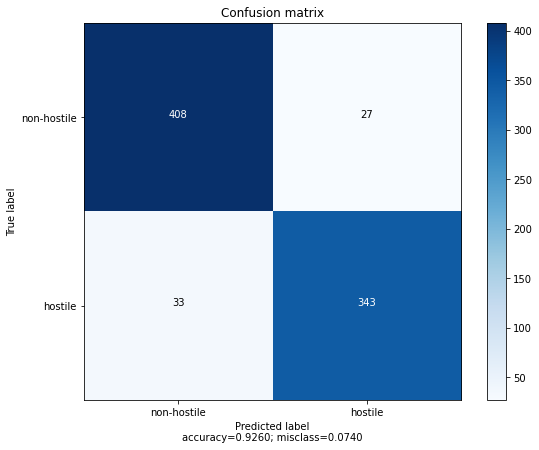

_________________________________________________________________________________________
_________________________________________________________________________________________
_________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       216
           1       0.83      0.71      0.77       160

    accuracy                           0.81       376
   macro avg       0.82      0.80      0.81       376
weighted avg       0.81      0.81      0.81       376



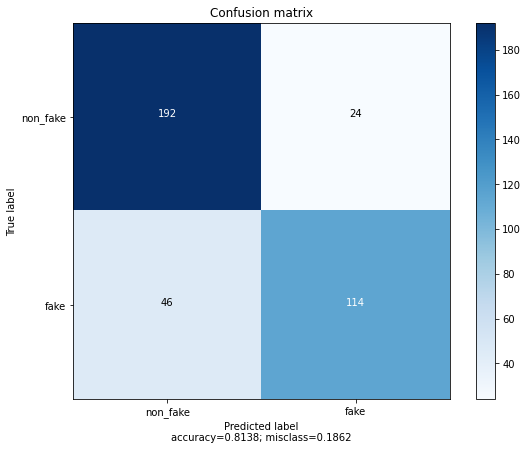

_________________________________________________________________________________________
_________________________________________________________________________________________
_________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       266
           1       0.48      0.47      0.48       110

    accuracy                           0.70       376
   macro avg       0.63      0.63      0.63       376
weighted avg       0.70      0.70      0.70       376



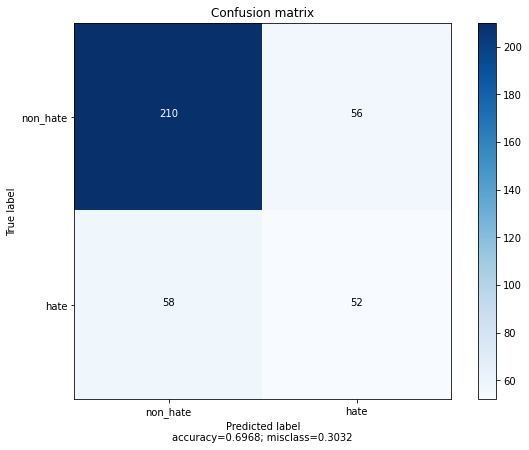

_________________________________________________________________________________________
_________________________________________________________________________________________
_________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       273
           1       0.51      0.50      0.50       103

    accuracy                           0.73       376
   macro avg       0.66      0.66      0.66       376
weighted avg       0.73      0.73      0.73       376



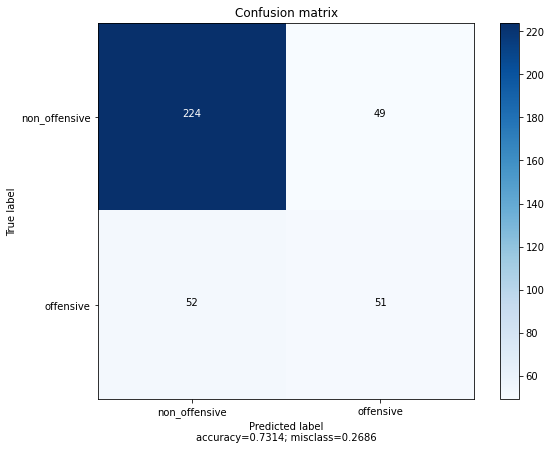

_________________________________________________________________________________________
_________________________________________________________________________________________
_________________________________________________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       299
           1       0.42      0.26      0.32        77

    accuracy                           0.77       376
   macro avg       0.62      0.58      0.59       376
weighted avg       0.74      0.77      0.75       376



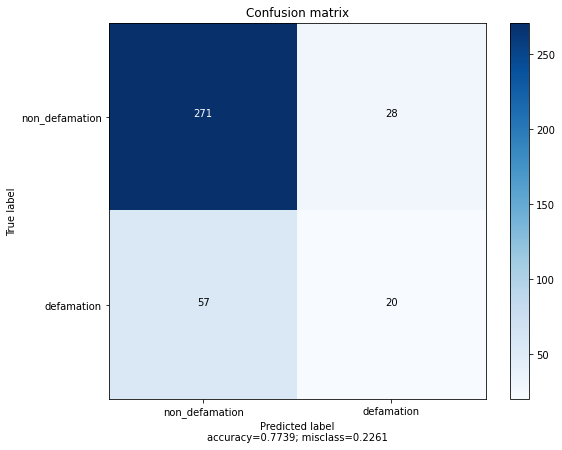

In [13]:
plot("non-hostile","hostile",y_true,y_pred)
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
plot("non_fake","fake",y_fake_true,y_fake_pred)
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
plot("non_hate","hate",y_hate_true,y_hate_pred)
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
plot("non_offensive","offensive",y_offensive_true,y_offensive_pred)
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
print("_________________________________________________________________________________________")
plot("non_defamation","defamation",y_defamation_true,y_defamation_pred)

### **VISUALIZING THE PREDICTED TEST LABELS :**

In [14]:
# reading test data 
test_df=pd.read_excel('/content/gdrive/My Drive/Hindi_Test (1).xlsx')
test_df.head()

,ID,Post
0,1,कीस की को रोजगार चाहिए फिर नहीं कहना रोजगार नहीं मिलता है 20 करोड को रोजगार दे दिया है वह भी मात्र 6 साँल में चार साल अभी बाकी है और हर साल दो करोड़ रोजगार देने का ही वादा था 10 साल में देना था 20 करोड को लोगो को रोजगार जो मात्र 6 साल में लक्ष्य को प्राप्त करने वाली पहली सरकार है
1,2,पटना BMP कैंप में पुरुष और महिला कांस्टेबल ने गोली मारकर की खुदकुशी जांच में जुटी पुलिस\n\n kumarprakash4u की रिपोर्ट\n\n
2,3,कोई भी कांग्रेसी ऊंची छत पर रेलवे लाइन पर ऊंची बिल्डिंग पर एकांत जगह पर कुए के पास दिखाई दे तुरंत पुलिस को सूचित करें \n\nविलुप्त होती हुई प्रजातियो को बचाना हमारा फर्ज है
3,4,अंडरवर्ल्ड डॉन छोटा राजन के भाई को बीजेपी द्वारा टिकट मिला है \n\n
4,5,RT Pb swain इन पंचर छापों को कोन समझाए कि उनके रोजगार में कमी का कारण मोदी नहीं \n\nट्यूब लैस टायर है


In [15]:
# reading test submissions  data 
test_submissions=pd.read_excel('/content/gdrive/My Drive/Test_Submission (1).xlsx')
test_submissions.head()

,Unique ID,Labels Set,Unnamed: 2
0,1,non-hostile,NaN
1,2,"hate,offensive",NaN
2,3,non-hostile,NaN
3,4,fake,NaN
4,5,fake,NaN


In [16]:
test_submissions=test_submissions.drop(columns='Unnamed: 2',axis=1)
test_submissions.head()

,Unique ID,Labels Set
0,1,non-hostile
1,2,"hate,offensive"
2,3,non-hostile
3,4,fake
4,5,fake


In [17]:
# hate,offensive is same as offensive ,hate . We change labels for visualization purpose
test_submissions['Labels Set'][216]="hate,offensive"
test_submissions['Labels Set'][178]="defamation,offensive"
test_submissions['Labels Set'][633]="defamation,offensive"
test_submissions['Labels Set'][679]="defamation,offensive"
test_submissions['Labels Set'][415]="defamation,hate"
test_submissions['Labels Set'][410]="defamation,hate,offensive"

In [18]:
test_submissions['Labels Set'].unique()

array(['non-hostile', 'hate,offensive', 'fake', 'hate', 'defamation',
       'offensive', 'defamation,fake', 'fake,hate', 'defamation,hate',
       'defamation,offensive', 'defamation,hate,offensive',
       'fake,offensive'], dtype=object)

In [19]:
test_submissions['Labels Set'].value_counts()

non-hostile                  994
fake                         239
hate                         110
offensive                    91 
hate,offensive               74 
defamation                   52 
defamation,offensive         21 
fake,hate                    21 
defamation,hate,offensive    20 
defamation,hate              18 
defamation,fake              12 
fake,offensive               1  
Name: Labels Set, dtype: int64

In [20]:
test_df["Predicted_Labels"]=test_submissions["Labels Set"]
test_df.head()

,ID,Post,Predicted_Labels
0,1,कीस की को रोजगार चाहिए फिर नहीं कहना रोजगार नहीं मिलता है 20 करोड को रोजगार दे दिया है वह भी मात्र 6 साँल में चार साल अभी बाकी है और हर साल दो करोड़ रोजगार देने का ही वादा था 10 साल में देना था 20 करोड को लोगो को रोजगार जो मात्र 6 साल में लक्ष्य को प्राप्त करने वाली पहली सरकार है,non-hostile
1,2,पटना BMP कैंप में पुरुष और महिला कांस्टेबल ने गोली मारकर की खुदकुशी जांच में जुटी पुलिस\n\n kumarprakash4u की रिपोर्ट\n\n,"hate,offensive"
2,3,कोई भी कांग्रेसी ऊंची छत पर रेलवे लाइन पर ऊंची बिल्डिंग पर एकांत जगह पर कुए के पास दिखाई दे तुरंत पुलिस को सूचित करें \n\nविलुप्त होती हुई प्रजातियो को बचाना हमारा फर्ज है,non-hostile
3,4,अंडरवर्ल्ड डॉन छोटा राजन के भाई को बीजेपी द्वारा टिकट मिला है \n\n,fake
4,5,RT Pb swain इन पंचर छापों को कोन समझाए कि उनके रोजगार में कमी का कारण मोदी नहीं \n\nट्यूब लैस टायर है,fake


Text(0.5, 1.0, 'Predicted Labels of test Dataset')

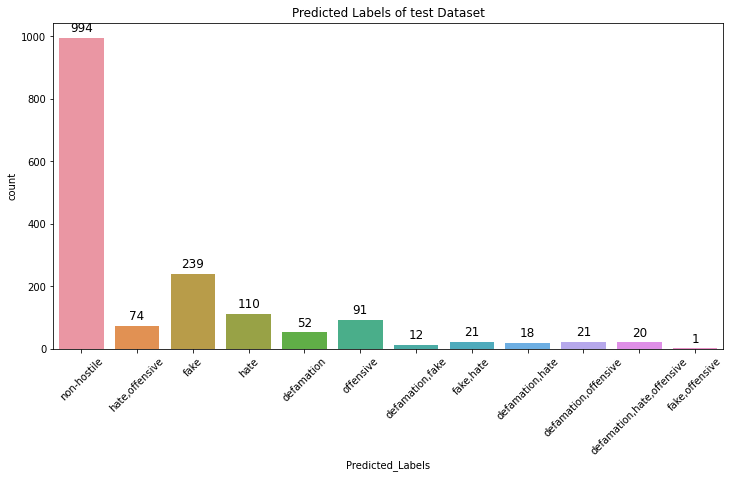

In [21]:
# predicted labels 
plt.figure(figsize=(12,6))
ax=sns.countplot(x="Predicted_Labels",data=test_df)
for tick in ax.get_xticklabels():
  tick.set_rotation(45) 
  # annotating the values in plots 
for p in ax.patches:
  ax.annotate(format(p.get_height(), ''), (p.get_x() + p.get_width()/2 , p.get_height()), ha = 'center', va = 'center', xytext = (0,10),rotation=0, textcoords = 'offset points',fontsize=12)
ax.set_title("Predicted Labels of test Dataset")

#### **CLEANING THE TEST DATA :**

In [22]:
# this function removes punctuations and special characters in the dataset
def PunctuationsAndSpecialSymbolsRemover(data):
  """
  input   : post data from train or validation or test data (list)
  returns : cleaned post with punctuations and special symbols removed 
  """
  non_needed_symbols = '''!()-…[]{};₹:“।|”'"\,<>./?@#$%^&*+_~'''
  cleaned_list=[]
  for line in data:
    cleaned_text=""
    for x in line:
      if x in non_needed_symbols:
        cleaned_text=cleaned_text+" "
      elif x not in non_needed_symbols:
        cleaned_text=cleaned_text+x
    cleaned_list.append(cleaned_text)
  return cleaned_list

# remove new lines notation "\n"
def remove_newlines(data):
  """
  input   : post data from train or validation or test data (list)
  returns : cleaned data with newlines ('\n') symbols removed 
  """
  modified_data=[]
  for line in data:
    new_line=re.compile("["u"\u000A" #newlines
                           "]+", flags=re.UNICODE)
    cleaned_text=new_line.sub(r'', line)
    modified_data.append(cleaned_text)
  return modified_data

# this function removes entire hyperlink 
def HyperLinkRemover(data):
  """
  input   : post data from train or validation or test data (list)
  returns : cleaned data with hyperlinks in the posts removed
  """
  non_hyperlink_text=[]
  for line in data:
    cleaned_text=re.sub(r"http\S+", "", line)
    non_hyperlink_text.append(cleaned_text)
  return non_hyperlink_text

# remove the emojis from the post 
def emojiRemover(data):
  """
  input   : post data from train or validation or test data (list)
  returns : cleaned data with all the emojis used in the post gets removed
  """
  emoji_less_data=[]
  for line in data:
    emoji_pattern=re.compile("["
                           u"\U0001F601-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6C0"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"  # Dingbats
                           u"\U000024C2-\U0001F251"  # Enclosed characters
                           u"\U0001F600-\U0001F636"  # Additional emoticons
                           u"\U0001F681-\U0001F6C5"  # Additional transport & map symbols
                           u"\U0001F30D-\U0001F567"  # Additional
                            u"\U0001f926-\U0001f937"
                            u"\u000A" #newlines
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u2022" # bullets 
                           "]+", flags=re.UNICODE)
    cleaned_text=emoji_pattern.sub(r'', line)
    #cleaned_text=uncategorized_emojis(cleaned_text)
    emoji_less_data.append(cleaned_text)
  return emoji_less_data

# function to do data-preprocessing 
def pre_processesing(data):
  """
  input   : post data from train or validation or test data (list)
  returns : cleaned data with all pre-processesing steps performed 
  """
  data=HyperLinkRemover(data)
  data=PunctuationsAndSpecialSymbolsRemover(data)
  data=emojiRemover(data)
  data=remove_newlines(data)
  return data

# function to return the cleaned data 
def cleaned_xlsx(dataset):
  """
  input   : dataset 
  returns : dataset with post content cleaned 
  """
  cleaned_df_hindi=pd.DataFrame()
  cleaned_df_hindi['ID']=dataset['ID']
  data=dataset['Post']
  cleaned_df_hindi['Post']=pre_processesing(data)
  cleaned_df_hindi['Predicted_Labels']=dataset['Predicted_Labels']
  return cleaned_df_hindi


In [23]:
# clean the test data 
cleaned_test_df=cleaned_xlsx(test_df)
cleaned_test_df.head()

,ID,Post,Predicted_Labels
0,1,कीस की को रोजगार चाहिए फिर नहीं कहना रोजगार नहीं मिलता है 20 करोड को रोजगार दे दिया है वह भी मात्र 6 साँल में चार साल अभी बाकी है और हर साल दो करोड़ रोजगार देने का ही वादा था 10 साल में देना था 20 करोड को लोगो को रोजगार जो मात्र 6 साल में लक्ष्य को प्राप्त करने वाली पहली सरकार है,non-hostile
1,2,पटना BMP कैंप में पुरुष और महिला कांस्टेबल ने गोली मारकर की खुदकुशी जांच में जुटी पुलिस kumarprakash4u की रिपोर्ट,"hate,offensive"
2,3,कोई भी कांग्रेसी ऊंची छत पर रेलवे लाइन पर ऊंची बिल्डिंग पर एकांत जगह पर कुए के पास दिखाई दे तुरंत पुलिस को सूचित करें विलुप्त होती हुई प्रजातियो को बचाना हमारा फर्ज है,non-hostile
3,4,अंडरवर्ल्ड डॉन छोटा राजन के भाई को बीजेपी द्वारा टिकट मिला है,fake
4,5,RT Pb swain इन पंचर छापों को कोन समझाए कि उनके रोजगार में कमी का कारण मोदी नहीं ट्यूब लैस टायर है,fake


In [24]:
hostile_test=cleaned_test_df[cleaned_test_df['Predicted_Labels']!="non-hostile"]
hostile_test.head()

,ID,Post,Predicted_Labels
1,2,पटना BMP कैंप में पुरुष और महिला कांस्टेबल ने गोली मारकर की खुदकुशी जांच में जुटी पुलिस kumarprakash4u की रिपोर्ट,"hate,offensive"
3,4,अंडरवर्ल्ड डॉन छोटा राजन के भाई को बीजेपी द्वारा टिकट मिला है,fake
4,5,RT Pb swain इन पंचर छापों को कोन समझाए कि उनके रोजगार में कमी का कारण मोदी नहीं ट्यूब लैस टायर है,fake
8,9,हैदराबाद बीजेपी विधायक राजा सिंह की बहन माया देवी ने इस्लाम स्वीकार कर लिया उन्होंने कहा कि भारत एक लोकतांत्रिक देश है जहां धर्म चुनना हमारा व्यक्तिगत अधिकार है कोई भी मजबूर नहीं कर सकता है,"hate,offensive"
9,10,कमलनाथ के राज में 100 में 100यूनिट बिजली मिल रही थीअब आए चोर शिवराज जो बिजली के बिलों को 500से 1000 तक कर दिया,hate


#### **SEPERATING TEST DATA USING OUTPUT LABELS :**

In [25]:
# creating offensive,fake,hate and defamation test datasets 
# creating dataset with each label passed through the function 
def vector_labels(data,col,neg):
  """
  input  : data: output label data (list)
           col : true label 
           neg : false label 
  return : list of output labels (if col in data return col else return neg for each entry in list od ata)
  """
  final_labels_vectors=[]
  for x in data:
    l=list(x.split(','))
    f=0
    for y in l:
      if y==col:
        final_labels_vectors.append(col)
        f=1
      if f==1:
        continue
    if f==0:
      final_labels_vectors.append(neg)
  return final_labels_vectors

# creating dataset by passing the given hostile labels
def hostile_label(dataset,col,neg):
  """
  input   : dataset : hostile data (entries which doesn't contain non-hostile)
                col : true label 
                neg : false label
  returns : modified dataset with output label should be positive label say only fake,only hate etc.
  """
  labelsvec_df_hindi=pd.DataFrame()
  labelsvec_df_hindi['ID']=dataset['ID']
  labelsvec_df_hindi['Post']=dataset['Post']
  data=dataset['Predicted_Labels']
  labelsvec_df_hindi['Predicted_Labels']=vector_labels(data,col,neg)
  return labelsvec_df_hindi[labelsvec_df_hindi["Predicted_Labels"]!=neg]

# fake vs non_fake
fake_test=hostile_label(hostile_test,"fake","non_fake")

# hate vs non_hate 
hate_test=hostile_label(hostile_test,"hate","non_hate")

# defamation vs non_defamation 
defamation_test=hostile_label(hostile_test,"defamation","non_defamation")

# offensive vs non_offensive 
offensive_test=hostile_label(hostile_test,"offensive","non_offensive")

In [26]:
print(fake_test.shape)
fake_test.head()

(273, 3)


,ID,Post,Predicted_Labels
3,4,अंडरवर्ल्ड डॉन छोटा राजन के भाई को बीजेपी द्वारा टिकट मिला है,fake
4,5,RT Pb swain इन पंचर छापों को कोन समझाए कि उनके रोजगार में कमी का कारण मोदी नहीं ट्यूब लैस टायर है,fake
10,11,दाऊद इब्राहिम और उसकी पत्नि की कोरोना संक्रमण से मौत,fake
12,13,Lucknow ट्रक की टक्कर से 2 लोग घायल महिला की मौत 2 युवक गंभीर घायल घायलों को ट्रामा सेंटर में कराया भर्ती ट्रक चालक को स्थानीय लोगों ने पकड़ा ट्रक चालक को पुलिस के हवाले किया मड़ियांव के छठामील सीतापुर रोड की घटना lkopolice LkoCp HappyTeachersDay policemedianews,fake
22,23,स्वास्थ्य मंत्रालय ने कोविड 19 के मद्देनजर चार राज्यों में उच्च स्तरीय केन्द्रीय दल नियुक्त करने का निर्णय लिया,fake


In [27]:
print(hate_test.shape)
hate_test.head()

(243, 3)


,ID,Post,Predicted_Labels
1,2,पटना BMP कैंप में पुरुष और महिला कांस्टेबल ने गोली मारकर की खुदकुशी जांच में जुटी पुलिस kumarprakash4u की रिपोर्ट,hate
8,9,हैदराबाद बीजेपी विधायक राजा सिंह की बहन माया देवी ने इस्लाम स्वीकार कर लिया उन्होंने कहा कि भारत एक लोकतांत्रिक देश है जहां धर्म चुनना हमारा व्यक्तिगत अधिकार है कोई भी मजबूर नहीं कर सकता है,hate
9,10,कमलनाथ के राज में 100 में 100यूनिट बिजली मिल रही थीअब आए चोर शिवराज जो बिजली के बिलों को 500से 1000 तक कर दिया,hate
15,16,BMC की अपील अगले सात दिनों तक गरम पानी का सेवन करें,hate
19,20,AMISHDEVGAN कुत्ते के पी तू बीजेपी जॉइन कर ले क्यों पत्रकारिता को कलंकित कर रहा है,hate


In [28]:
print(offensive_test.shape)
offensive_test.head()

(207, 3)


,ID,Post,Predicted_Labels
1,2,पटना BMP कैंप में पुरुष और महिला कांस्टेबल ने गोली मारकर की खुदकुशी जांच में जुटी पुलिस kumarprakash4u की रिपोर्ट,offensive
8,9,हैदराबाद बीजेपी विधायक राजा सिंह की बहन माया देवी ने इस्लाम स्वीकार कर लिया उन्होंने कहा कि भारत एक लोकतांत्रिक देश है जहां धर्म चुनना हमारा व्यक्तिगत अधिकार है कोई भी मजबूर नहीं कर सकता है,offensive
15,16,BMC की अपील अगले सात दिनों तक गरम पानी का सेवन करें,offensive
20,21,पटना लालू तेजस्वी को एक और झटका तेघड़ा राजद MLA विरेंद्र कुमार JDU में शामिल Patna BiharAssemblyElections2020 RJD JDU VirendraKumar,offensive
24,25,बिहार 50 साल से ज्यादा उम्र के पुलिसकर्मियों के काम की होगी समीक्षा पुलिस एसोसिएशन ने जताई नाराजगी Bihar BiharPolice nitishKumar,offensive


In [29]:
print(defamation_test.shape)
defamation_test.head()

(123, 3)


,ID,Post,Predicted_Labels
14,15,ishiviparihar Baklol801 सुन कमीनी तेरे से अच्छी हिंदी ओर इंग्लिश आती है ओर अपनी औकात में रह के बोल तेरे को कुछ बोली नही हूं मैं अगर बीच मे आयी तो बीच मे से ही फाड़ दूंगी ओर लिखने की बात है तो कीबोर्ड से ऑटोटायपिंग भी होता है इसलिये अपनी अम्मा को बोल जो बोलना है निकल,defamation
29,30,दोस्तों मैंने इस्तीफा देकर सही किया ना अगर हां तो रिट्वीट करें वरना लाइक करें pic twitter com 6bdeyDTfHz,defamation
48,49,जिस राज्य में 40 लाख प्रवासी जन आए हों वहां कोरोना संक्रमण की स्थिति अन्य सम्पन्न राज्यों की तुलना में नियंत्रित है हमने अपने एक एक नागरिक की सुरक्षा सुनिश्चित की है यह सब इसलिए संभव हो सका क्योंकि यहां एक टीम काम कर रही थी कोरोना वॉरियर्स को नमन,defamation
66,67,KanganaTeam Sanjay baroda पीओके में बनी आतंकी के बनकर पर सर्जिकल स्ट्राइक बीएमसी ने कर दी,defamation
67,68,MP अपने अधिकार के लिए नही बोल सकते तो जनता के लिए क्या करेंगे सांसदों को मोदी जी से पूछना चाहिए कि 8000 करोड़ की नई जहाज अपने ठाट के लिए क्यों खरीद रहे हैं वर्तमान व्यवस्था पर्याप्त है MPLAD दो साल के लिए काट दिया जो इतनी ही राशि का है इससे जनता की भलाई होता है INCIndia,defamation


#### **TOP NAMED ENTITIES IN PREDICTED TEST FOR FAKE,HATE,OFFENSIVE AND DEFAMATION LABELS :**

In [30]:
# embedding package for english 
downloader.download("embeddings2.en")
# embedding package for hindi
downloader.download("embeddings2.hi")
# named entity recognition package for english 
downloader.download("ner2.en")
# named entity recognition package for english 
downloader.download("ner2.hi")

[polyglot_data] Downloading package embeddings2.en to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package embeddings2.hi to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.en to /root/polyglot_data...
[polyglot_data] Downloading package ner2.hi to /root/polyglot_data...


True

In [31]:
# this function removes named entity for the given language code 
def named_entity_recognition(data,code,ner_list):
  """
  input   : data : post (not lists of posts only one post)
            code : language code either english("en") or hindi("hi") 
            ner_list: list containing the named entities 
  returns : named recognized entities in the data given as input appended to the given ner_list
  """
  l=[]
  entity=Text(data,hint_language_code=code).entities
  ner=[]
  for o in entity:
    ner.append(" ".join(o))  
  for item in ner:
    ner_list.extend(item.split()) 
  new=list(data.split(" "))
  for y in new:
    if y in ner_list:
      new.remove(y)
  l.append(new)
  return ner_list

# creates the list of named entities in the dataset given as input 
def return_named_entities(dataset):
  """
  input   : dataset : cleaned binary label data 
  returns : list of named entities recognized in the dataset posts
  """
  cleaned_df_hindi=pd.DataFrame()
  cleaned_df_hindi['ID']=dataset['ID']
  data=dataset['Post']
  ner_list=[]
  for d in data:
    ner_list=named_entity_recognition(d,"hi",ner_list)
  return ner_list

# creates a bar plot where named entity along xaxis and frequency along y axis
def ner_plot(df):
  """
  input : df - dataframe 
  plots : bar plot (named entities vs frequency)
  """
  plt.figure(figsize=(12,5))
  ax1=sns.barplot(x="English Words",y="Frequency",data=df,palette="OrRd_r")
  for tick in ax1.get_xticklabels():
    tick.set_rotation(0) 
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  ax1.set_yticks([])
  return 

# creates the dataframe containing the named entity in a column and corresponding frequency in other column and plot 
def NamedEntityFrequency(df,english_words):
  """
  input : df - dataset 
          english_words - corresponding english word for each hindi word named entity
  returns : dataframe containing the named entities with corresponding frequency in given dataset df
  plots : named entities with frequency
  """
  ner_list=return_named_entities(df)
  # gives set of unique words 
  unique_words = set(ner_list) 
  my_dict={}
  for words in unique_words : 
    my_dict[words]=ner_list.count(words)
  key_list=[]
  value_list=[]
  for k,v in my_dict.items():
    key_list.append(k)
    value_list.append(v)
  ner_df=pd.DataFrame()
  ner_df["Words"]=key_list
  ner_df["Frequency"]=value_list
  top_ner_words=ner_df.sort_values(by="Frequency",ascending=False).head(10)
  top_ner_words["English Words"]=english_words
  ner_plot(top_ner_words)
  return top_ner_words

FAKE DATASET 


,Words,Frequency,English Words
311,भारत,35,India
15,मोदी,25,Modi
55,दिल्ली,15,Delhi
128,पाकिस्तान,14,Pakisthan
59,मुंबई,11,Mumbai
255,कश्मीर,10,Riya
176,रिया,10,Kashmir
13,प्रदेश,7,Region
67,बीजेपी,7,BJP
80,बिहार,6,Lion


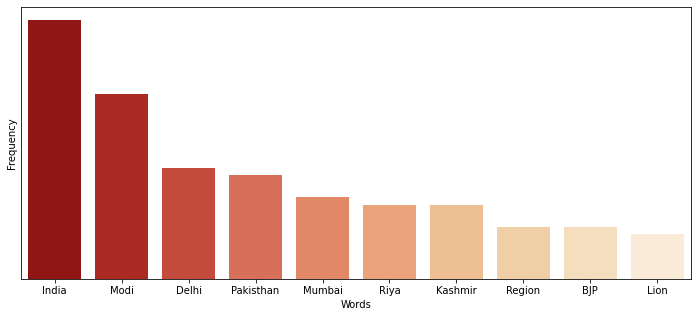

In [32]:
fake_english_words=["India","Modi","Delhi","Pakisthan","Mumbai","Riya","Kashmir","Region","BJP","Lion"]
print("FAKE DATASET ")
NamedEntityFrequency(fake_test,fake_english_words)

HATE DATASET 


,Words,Frequency,English Words
168,भारत,26,India
48,मोदी,22,Modi
151,प्रणब,10,Pranab
83,सिंह,9,Lion
267,मुखर्जी,8,Mukherjee
307,जेएनयू,8,JNU
54,चीन,7,Rahul
176,दिल्ली,7,Region
43,प्रदेश,7,Ram
172,राम,7,Delhi


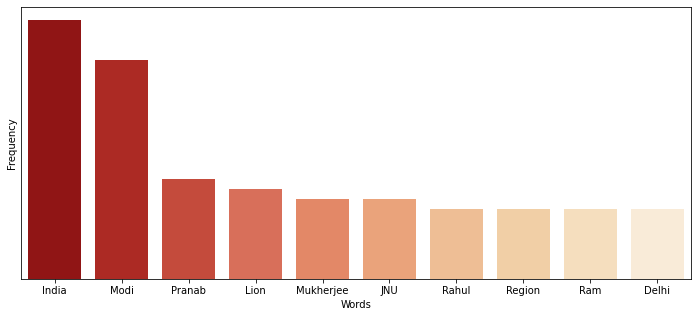

In [33]:
hate_english_words=["India","Modi","Pranab","Lion","Mukherjee","JNU","Rahul","Region","Ram","Delhi"]
print("HATE DATASET ")
NamedEntityFrequency(hate_test,hate_english_words)

OFFENSIVE DATASET 


,Words,Frequency,English Words
145,भारत,34,India
36,मोदी,11,Modi
43,चीन,10,China
148,कांग्रेस,9,Congress
149,दिल्ली,9,Delhi
3,गांधी,8,Lion
68,सिंह,8,Gandhi
236,रिया,7,Riya
201,संजय,7,Mumbai
170,मुंबई,7,Sanjay


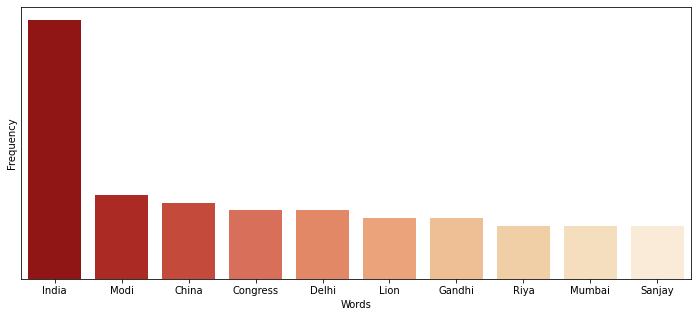

In [34]:
offensive_english_words=["India","Modi","China","Congress","Delhi","Lion","Gandhi","Riya","Mumbai","Sanjay"]
print("OFFENSIVE DATASET ")
NamedEntityFrequency(offensive_test,offensive_english_words)

DEFAMATION DATASET 


,Words,Frequency,English Words
90,दिल्ली,14,Delhi
82,भारत,13,India
16,मोदी,10,Modi
88,कांग्रेस,7,Congress
130,बिहार,6,Bihar
147,रिया,6,Riya
17,चीन,6,JNU
152,जेएनयू,6,China
126,भाजपा,5,Police
39,सिंह,5,Region


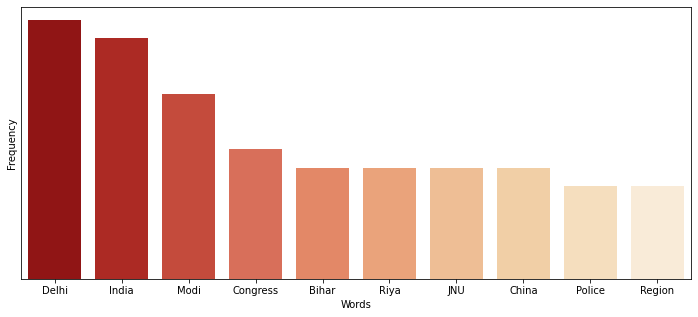

In [35]:
defamation_english_words=["Delhi","India","Modi","Congress","Bihar","Riya","JNU","China","Police","Region"]
print("DEFAMATION DATASET ")
NamedEntityFrequency(defamation_test,defamation_english_words)